In [1]:
import numpy as np

In [2]:
s1 = np.random.normal(0, 1, 100000)

In [3]:
s2 = np.random.normal(4, 1, 100000)

In [4]:
NUM_BINS= 1000

In [5]:
def calc_bin_index(s, mean, sigma, dont_skip=True): 
    index = int(((s - mean)  / (4*sigma)   + 0.5) * NUM_BINS)
    if dont_skip:
        if index < 0: index = 0
        if index > NUM_BINS - 1: index = NUM_BINS - 1
    return index

In [6]:
def make_histogram(s, mean, sigma):
    a = np.zeros(NUM_BINS, dtype=np.int32)
    skipped = 0
    for value in s:
        index = calc_bin_index(value, mean, sigma, dont_skip=False)
        if index >= 0 and index < NUM_BINS - 1: a[index] += 1
        else: skipped += 1
    print(skipped)
    return a
        

In [7]:
hist1 = make_histogram(s1, 0, 1)


4580


In [8]:
hist2 = make_histogram(s2, 4, 1)


4491


In [9]:
s_hist1 = np.convolve(hist1, np.array([1, 1, 1, 1])/4)
s_hist2 = np.convolve(hist2, np.array([1, 1, 1, 1])/4)

In [10]:
import matplotlib.pyplot as plt

In [11]:
s_hist1 /= sum(s_hist1)
s_hist2 /= sum(s_hist2)

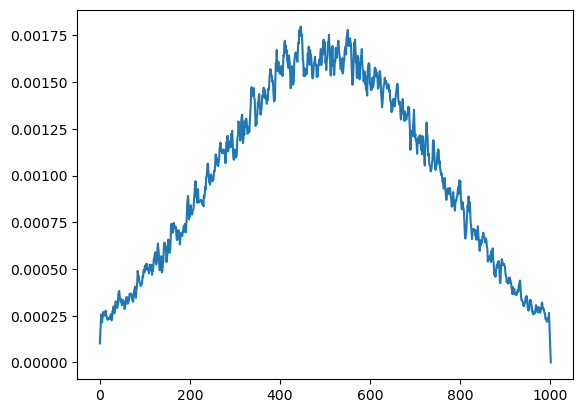

In [12]:
plt.plot(s_hist1)

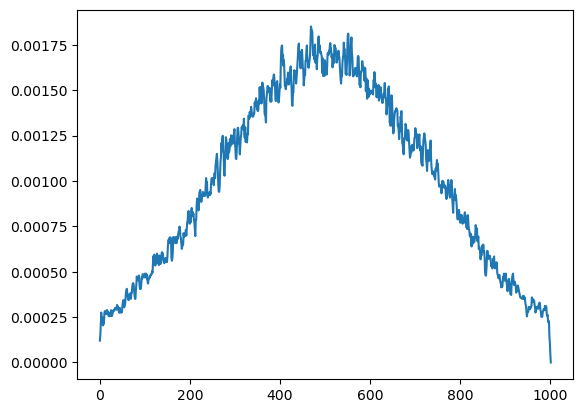

In [13]:
plt.plot(s_hist2)

In [24]:
def calc_lr(x):
    p1 = s_hist1[calc_bin_index(x,  0, 1)]
    p2 = s_hist2[calc_bin_index(x,  4, 1)]
    # print(p1, p2)
    return p2/p1
   

In [15]:
calc_lr(2.)

0.00020173967721651644 0.00012040750086379295


0.5968459081778246

In [25]:
def classify(x, tau = 1):
    if calc_lr(x) > tau: return True 
    else: return False

In [19]:
plot_hist1 = np.array(NUM_BINS)


In [22]:
test_ds = np.append(s1[:5000], s2[:5000])
test_ds.shape


(10000,)

In [40]:
fp_arr, tp_arr = [], []
for tau in np.arange(1, 5, 0.2):
    results = np.empty(test_ds.shape)
    for i,samp in enumerate(test_ds):
        results[i] = classify(samp, tau=tau)
    
    num_fp = sum(results[:5000])
    num_tp = sum(results[5000:])
    fp_arr.append(num_fp)
    tp_arr.append(num_tp)


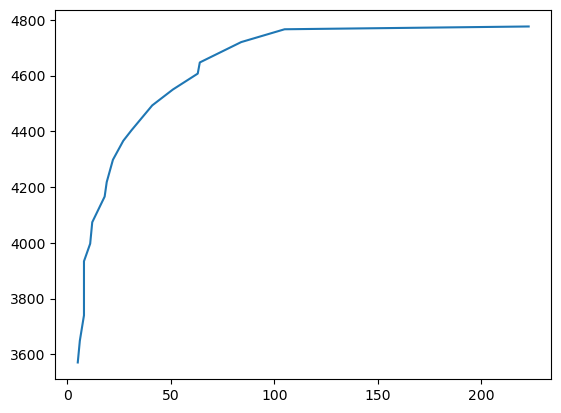

In [44]:
plt.plot(fp_arr , tp_arr)